<a href="https://colab.research.google.com/github/ihaseebmohammed/ML-projects/blob/main/ZomatoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Dataset Exploratary Data Analysis and Linear Regression 

The data contains details of restaurants associated with an online e-commerce food aggregator. Various data points are available related to the restaurants. We explore the data points one by one and try to find best insights from it.

Table of Contents
* [Different Data Points And Cleaning Data](#Data_Points)
* [Data Exploration](#Data_Exploration)
* [Word Cloud](#Word_Cloud)
* [Tree Map](#Tree_Map)
* [Linear Regression Model](#Linear_Regression_Model)
* [Result and Performace of Model](#Performance_of_LR_Model)

## First we will lay the groundwork.

In [1]:
import pandas as pd
from plotly import graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from wordcloud import WordCloud

In [2]:
dfZomatoWholeDataset=pd.read_csv('/content/zomato.csv',encoding="latin-1")
dfZomatoCountry=pd.read_excel('/content/Country-Code.xlsx')
print(dfZomatoCountry.info())
print(dfZomatoWholeDataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9

We will merge the two tables on Country Code and find out distributions of restaurants in dataset.

In [3]:
dfZomatoMerged=pd.merge(dfZomatoWholeDataset,dfZomatoCountry,on="Country Code",how="left")
dfZomatoMerged.groupby("Country").agg(Total_Count=("Restaurant ID","count")).sort_values(by="Total_Count",ascending=False)

,Total_Count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


**As we can see majority of the data is from India. From now on we will do our analysis only on restaurants present in India.**

In [4]:
dfZomato=dfZomatoMerged[dfZomatoMerged["Country"]=="India"].reset_index(drop=True).copy()

<a id="Data_Points"></a>
### What are the data points available in the dataset and what they mean?

In [5]:
dfZomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu 

### What various columns means?

- **Restaurant ID** – Unique ID provided to each restaurant
- **Restaurant Name** – Name of the Restaurant
- **Country Code** – Code of the country in which the restaurant are located
- **Address** – Address of the Restaurant
- **City** – City in which restaurant is located
- **Locality** – Locality of city in which restaurants are located,
- **Locality Verbose** -  Detailed description of locality
- **Latitude** – Co-ordinates of individual restaurant
- **Longitude** - Co-ordinates of individual restaurant
- **Cuisines** – Cuisines offered by the Restaurant
- **Average Cost for two**  -   Cost for two people in different currencies.
- **Currency** – Legal tender for the country.
- **Has Table booking** – If Restaurant has facility of prior table booking. Answers are in Yes/No,
- **Has Online delivery?** - If Restaurant has facility of Online Delivery. Answers are in Yes/No.
- **Is delivering now?** – If Restaurant was offering home delivery when the data was collected. 
- **Price Range** – Range of price food.
- **Aggregate rating**- Average rating out of 5.
- **Rating Color** – A color assigned to restaurant based Aggregate rating
- **Rating Text** – Segments the restaurant ratings in Five Categories – Excellent, Very Good, Good, Average, Poor, Not Rated
- **Votes** – Total Number of ratings given by people.
- **Country** - Name of the Country               

Now that we know various columns names let us see if there are any duplicates in the records or any null values.

In [6]:
dfZomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
print("Before:"+str(dfZomato.shape[0]))
dfZomato.drop_duplicates(inplace=True)
print("After:"+str(dfZomato.shape[0]))

Before:8652
After:8652


Our data looks clean. There are no missing values as well as there are no duplicates.

##### Renaming Columns

In [8]:
dfZomato.rename(columns={"Restaurant ID":"restaurant_id","Restaurant Name":"restaurant_name","Country Code":"country_code",
                           "Locality Verbose":"locality_verbose","Average Cost for two":"average_cost_two","Has Table booking":"table_booking",
                           "Has Online delivery":"online_delivery","Is delivering now":"is_delivering_now","Switch to order menu":"switch_to_order",
                           "Price range":"price_range","Aggregate rating":"agg_rating","Rating color":"rating_color","Rating text":"rating_text"},inplace=True)

In [9]:
dfZomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 0 to 8651
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      8652 non-null   int64  
 1   restaurant_name    8652 non-null   object 
 2   country_code       8652 non-null   int64  
 3   City               8652 non-null   object 
 4   Address            8652 non-null   object 
 5   Locality           8652 non-null   object 
 6   locality_verbose   8652 non-null   object 
 7   Longitude          8652 non-null   float64
 8   Latitude           8652 non-null   float64
 9   Cuisines           8652 non-null   object 
 10  average_cost_two   8652 non-null   int64  
 11  Currency           8652 non-null   object 
 12  table_booking      8652 non-null   object 
 13  online_delivery    8652 non-null   object 
 14  is_delivering_now  8652 non-null   object 
 15  switch_to_order    8652 non-null   object 
 16  price_range        8652 

<a id="Data_Exploration"></a>
## Exploring the data

First we will see where our data is concentrated. To find this we will make a pie chart to see where the major proportion of restaurants in dataset are situated.

In [10]:
dfZomato["City"].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

We can see that majority of restaurants are present in New Delhi, Gurgaon, Faridabad, and Noida. We will visualize this in a pie chart. To make it visually clean, we will combine the the cities having less than 25 restaurants into one segment.


In [11]:
Restaurants=dfZomato["City"].value_counts().reset_index()
Restaurants["C_City"]=Restaurants.apply(lambda x:x["index"] if x["City"]>=25 else "Other Cities" ,axis=1)
Restaurants.rename(columns={"City":"Count","C_City":"City"},inplace=True)
Final_Restaurants=Restaurants.groupby("City").agg(Count=("Count","sum"))

In [12]:
fig1 = go.Figure(data = go.Pie(values = Final_Restaurants["Count"], 
                               labels = Final_Restaurants.index,
                               customdata = Final_Restaurants["Count"],
                               pull = [0,0,0,0,0,0.25],
                               hovertemplate ="%{label}<br>Restaurant Count:%{customdata}"))

fig1.update_traces(textinfo='label+percent', textfont_size=15)
fig1.update_layout(title_text = 'Propotion of Restaurants in Different Cities',title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))

fig1.show()

**_After analysis we found that most of the restaurants are located in National Capital Region (NCR) in India. The NCR region consists of New Delhi and surrounding cities i.e Ghaziabad, Faridabad, Gurgaon and Noida. From the following Pie Chart we can see that only 8.15% of restaurants in the data come from cities NOT PRESENT in the NCR Region._**

## Factors affecting votes recieved by restaurants 
Votes are the number of individual ratings that are given to restaurants.

#### 1. Votes
- How many restaurants offer Online Delivery to their customers?
- Is there difference in average number of votes recieved by restaurant offering online delivery vs restaurant not offering online delivery?

In [13]:
Total_Restaurants_Delivery=dfZomato.groupby("online_delivery").agg(Total_Restaurants=("restaurant_id","count"))
Avg_Votes=dfZomato.groupby("online_delivery").agg(Average_Votes=("Votes","mean"))

In [14]:
fig2=make_subplots(rows=1, cols=2,
                   specs=[[{"type":"domain"},{"type":"bar"}]],
                   subplot_titles=('Percentage Of Restaurants Offering Delivery','Average Votes vs Online Delivery'))

fig2.add_trace(go.Pie(labels=Total_Restaurants_Delivery.index,
                      values=Total_Restaurants_Delivery.Total_Restaurants,
                      hovertemplate ="%{label}<br>Restaurant Count:%{value}",
                      hoverinfo=None,
                      texttemplate = "%{label}<br>%{percent}",
                      marker=dict(colors=["orangered","lightgreen"]),
                      showlegend=True),row=1,col=1)

fig2.add_trace(go.Bar(x=Avg_Votes.index,
                      y=Avg_Votes["Average_Votes"],
                     hovertemplate ="%{label}<br>Average Votes:%{value}",
                     texttemplate = "Average Votes<br>%{value}",
                     marker=dict(color=["orangered","lightgreen"]),
                     showlegend=False),row=1,col=2)

fig2.update_xaxes(title_text="Has Online Delivery?", row=1, col=2)
fig2.update_yaxes(title_text="Average Votes", row=1, col=2)


fig2.update_traces(textfont_size=15)
fig2.update_layout(title_text = 'Graphs showing relation between votes and online delivery',title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))


The majority of restaurants do not offer online delivery facility to their customers. Only 28% of restaurants offer this facility to their customers. 

In conclusion, on an average, Restaurants offering online delivery to their customers received more votes than the restaurants which don’t offer one. This could be attributed to multiple reasons

-	One probable reason can be that people ordering food online are more tech-savvy and generally give their review for food they ordered.
-	Another reason could be that online food delivery apps prompt their users to review the food they ordered after some time.
-	Having online delivery facilities could also increase the reach of the restaurants which would result in more people consuming the services of restaurant and voting on the same. 

More data would be required to confirm the reasons behind this situation.

#### 2. Table Booking
- How many restaurants offer Table Booking to their customers?
- Is there difference in average number of votes recieved by restaurant offering Table Booking vs restaurant not offering online delivery?

In [15]:
Total_Restaurants_Booking=dfZomato.groupby("table_booking").agg(Total_Restaurants=("restaurant_id","count"))
Avg_Votes_Booking=dfZomato.groupby("table_booking").agg(Average_Votes=("Votes","mean"))

In [16]:
fig2=make_subplots(rows=1, cols=2,
                   specs=[[{"type":"domain"},{"type":"bar"}]],
                   subplot_titles=('Percentage Of Restaurants Offering Table Booking','Average Votes vs Table Booking'))

fig2.add_trace(go.Pie(labels=Total_Restaurants_Booking.index,
                      values=Total_Restaurants_Booking.Total_Restaurants,
                      hovertemplate ="%{label}<br>Restaurant Count:%{value}",
                      hoverinfo=None,
                      texttemplate = "%{label}<br>%{percent}",
                      marker=dict(colors=["orangered","lightgreen"]),
                      showlegend=True),row=1,col=1)

fig2.add_trace(go.Bar(x=Avg_Votes_Booking.index,
                      y=Avg_Votes_Booking["Average_Votes"],
                     hovertemplate ="%{label}<br>Average Votes:%{value}",
                     texttemplate = "Average Votes<br>%{value}",
                     marker=dict(color=["orangered","lightgreen"]),
                     showlegend=False),row=1,col=2)

fig2.update_xaxes(title_text="Has Table Booking?", row=1, col=2)
fig2.update_yaxes(title_text="Average Votes", row=1, col=2)

fig2.update_traces(textfont_size=15)
fig2.update_layout(title_text = 'Graphs showing relation between votes and Table Booking',
                   title_font = dict(size=25,family='Verdana', color='darkred'))


Only 12.84% of restaurants offer Table Booking to their customers. Majority of restaurants do not have facility to reserve table for their customers.
However, Restaurants offering table booking received significantly more votes than the ones who don’t offer this service. We can infer this from the above visuals.

#### 3. Total Number Of Cuisines
We will see if having more cuisines coould affect the number of votes recieved by an restaurants. First we will need to write a logic so that we can count the number of cuisines each restaurant has.

In [17]:
dfZomato["Total_Cuisines"]=dfZomato.apply((lambda x: len(x["Cuisines"].split(','))),axis=1)

In [18]:
dfZomato["Total_Cuisines"].value_counts()

2    3144
1    3097
3    1596
4     552
5     155
6      70
7      26
8      12
Name: Total_Cuisines, dtype: int64

**_As we can see that restaurants that have 6 or more cuisines are very less in number. We will merge this segment into one so that insights that we gain from this are more statistically significant and not skewed in one direction because of few bad restaurants or few good restaurants._**

In [19]:
dfZomato["Total_Cuisines"]=dfZomato.apply(lambda x: 6 if x["Total_Cuisines"]>5 else x["Total_Cuisines"],axis=1 )
aggTotalCsn=dfZomato.groupby("Total_Cuisines").agg(Avg_Votes=("Votes","mean"),Median_Votes=("Votes","median"))
aggTotalCsn["Cuisines_Number"]=aggTotalCsn.index.astype(str)
aggTotalCsn.loc[6,"Cuisines_Number"]="6 or More"

In [20]:
fig3= go.Figure(data=[
    go.Bar(name='Average Votes', x=aggTotalCsn.Cuisines_Number, y=aggTotalCsn["Avg_Votes"],
           hovertemplate ="Total Cuisines:%{label}<br>Average Votes:%{value}",hoverinfo=None),
    
    go.Bar(name='Median Votes', x=aggTotalCsn.Cuisines_Number, y=aggTotalCsn["Median_Votes"],
          hovertemplate ="Total Cuisines:%{label}<br>Median Votes:%{value}",hoverinfo=None)])

fig3.update_traces(textfont_size=15)
fig3.update_layout(barmode='group',
                    xaxis=dict(title="Number Of Cuisines" ),
                    yaxis=dict(title="Votes"))
fig3.show()

**_Quick Inference_** - 
- The average as well as median number of votes increases as the number of cuisines increases. The average number of votes increases from 109 for restaurants offering 1 cuisines to 457 for restaurants offering 6 cuisines or more.One reason could be that restaurants offering multiple cuisines cater more type of people in general and which in turn increases the votes received by them on average.
- We consider both average and median number of votes in our analysis to remove out the scenario where averages become don’t represent populations because of few extreme results. The trend appears to be same for both measures of centrality which provides supports to the above relationship between Total Cuisines and Number of Votes.


## Factors Affecting Restaurants Rating

Restaurant ratings depend on many factors such as Portion Size, Ambience, Waiting Time, and also on different facilities that are provided by restaurants such as Valet Parking, Online Delivery, Table booking etc.

Aggregate Ratings are the averages of all individual ratings which are given to restaurants. These ratings are measured on the scale of 5. Ratings also have color and text associated with them. We will define the range of different rating colors and rating text in terms of aggregate rating.

In [21]:
rating=dfZomato.groupby(["rating_color","rating_text"]).agg(Min=("agg_rating","min"),Max=("agg_rating","max"))
print(rating)

                          Min  Max
rating_color rating_text          
Dark Green   Excellent    4.5  4.9
Green        Very Good    4.0  4.4
Orange       Average      2.5  3.4
Red          Poor         1.8  2.4
White        Not rated    0.0  0.0
Yellow       Good         3.5  3.9


<Figure size 432x432 with 0 Axes>

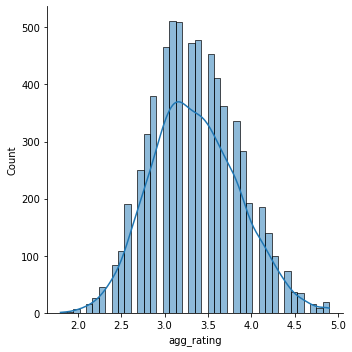

In [22]:
plt.figure(figsize=(6,6))
sns.displot(dfZomato[dfZomato["rating_text"]!="Not rated"]['agg_rating'],kde=True)
plt.show()

From the visuals we can see that ratings are following a normal distribution if we exclude the Not Rated restaurants.

#### 1. Analysis of Rating recieved by restaurants based on availabitlity of Online Delivery and Table Booking facility.

In [23]:
aggTotalod=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["online_delivery","rating_text"]).agg(Restaurant_Count=("restaurant_id","count"))
aggTotaltb=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["table_booking","rating_text"]).agg(Restaurant_Count=("restaurant_id","count"))

In [24]:
x1=aggTotalod.reset_index()["online_delivery"].unique()
fig7=make_subplots(rows=1, cols=2,
                   specs=[[{"type":"xy","secondary_y":True},{"type":"xy","secondary_y":True}]],
                   subplot_titles=('Online Delivery vs Rating','Table Booking vs Rating'))

fig7.add_trace(go.Bar(name="Poor",
                      legendgroup='Poor',
                      x=x1,
                      y=(np.array(aggTotalod["Restaurant_Count"][:,"Poor"])/np.array(aggTotalod["Restaurant_Count"].groupby("online_delivery").sum()))*100,
                      marker=dict(color="red"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=1)

fig7.add_trace(go.Bar(name="Average",
                      legendgroup='Average',
                      x=x1,
                      y=(np.array(aggTotalod["Restaurant_Count"][:,"Average"])/np.array(aggTotalod["Restaurant_Count"].groupby("online_delivery").sum()))*100,
                      marker=dict(color="orange"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=1)

fig7.add_trace(go.Bar(name="Good",
                      legendgroup='Good',
                      x=x1,
                      y=(np.array(aggTotalod["Restaurant_Count"][:,"Good"])/np.array(aggTotalod["Restaurant_Count"].groupby("online_delivery").sum()))*100, 
                      marker=dict(color="yellow"),width=[0.6]*6 ,
                      hoverinfo=None),row=1,col=1)

fig7.add_trace(go.Bar(name="Very Good",
                      legendgroup='Very Good',
                      x=x1,
                      y=(np.array(aggTotalod["Restaurant_Count"][:,"Very Good"])/np.array(aggTotalod["Restaurant_Count"].groupby("online_delivery").sum()))*100, 
                      marker=dict(color="lightgreen"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=1)

fig7.add_trace(go.Bar(name="Excellent",
                      legendgroup='Excellent',
                      x=x1,
                      y=(np.array(aggTotalod["Restaurant_Count"][:,"Excellent"])/np.array(aggTotalod["Restaurant_Count"].groupby("online_delivery").sum()))*100, 
                      marker=dict(color="darkgreen"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=1)

fig7.add_trace(go.Bar(name="Poor",
                      legendgroup='Poor',
                      x=x1,
                      y=(np.array(aggTotaltb["Restaurant_Count"][:,"Poor"])/np.array(aggTotaltb["Restaurant_Count"].groupby("table_booking").sum()))*100,marker=dict(color="red"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=2)

fig7.add_trace(go.Bar(name="Average"
                      ,legendgroup='Average',
                      x=x1,
                      y=(np.array(aggTotaltb["Restaurant_Count"][:,"Average"])/np.array(aggTotaltb["Restaurant_Count"].groupby("table_booking").sum()))*100,
                      marker=dict(color="orange"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=2)

fig7.add_trace(go.Bar(name="Good",
                      legendgroup='Good',
                      x=x1,
                      y=(np.array(aggTotaltb["Restaurant_Count"][:,"Good"])/np.array(aggTotaltb["Restaurant_Count"].groupby("table_booking").sum()))*100,
                      marker=dict(color="yellow"),width=[0.6]*6 ,
                      hoverinfo=None),row=1,col=2)

fig7.add_trace(go.Bar(name="Very Good",
                      legendgroup='Very Good',
                      x=x1,
                      y=(np.array(aggTotaltb["Restaurant_Count"][:,"Very Good"])/np.array(aggTotaltb["Restaurant_Count"].groupby("table_booking").sum()))*100,
                      marker=dict(color="lightgreen"),width=[0.6]*6,
                      hoverinfo=None),row=1,col=2)

fig7.add_trace(go.Bar(name="Excellent",
                      legendgroup='Excellent',
                      x=x1,
                      y=(np.array(aggTotaltb["Restaurant_Count"][:,"Excellent"])/np.array(aggTotaltb["Restaurant_Count"].groupby("table_booking").sum()))*100,
                      marker=dict(color="darkgreen"),
                      width=[0.6]*6,
                      hoverinfo=None),row=1,col=2)

fig7.add_trace(                          
    go.Scatter(                          
    x=x1,
    y=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["online_delivery"]).agg(Median=("agg_rating","median"))["Median"],
    name="Median Rating",
    mode='lines',                                                       
    line = dict(color='blue', width=3),   
    yaxis="y2" ,
    legendgroup='Median Rating'),
    secondary_y=True,
    row=1,
    col=1                        
    ) 

fig7.add_trace(                          
    go.Scatter(                          
    x=x1,
    y=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["online_delivery"]).agg(Average=("agg_rating","mean"))["Average"],
    name="Average Rating",
    mode='lines',                                                       
    line = dict(color='lightblue', width=3),   
    yaxis="y2" ,
    legendgroup='Average Rating'),secondary_y=True,
    row=1,
    col=1                       
    )

fig7.add_trace(                          
    go.Scatter(                          
    x=x1,
    y=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["table_booking"]).agg(Median=("agg_rating","median"))["Median"],
    name="Median Rating",
    mode='lines',                                                       
    line = dict(color='blue', width=3),   
    yaxis="y3" ,
    legendgroup='Median Rating'),
    secondary_y=True,
    row=1,
    col=2                        
    ) 

fig7.add_trace(                          
    go.Scatter(                          
    x=x1,
    y=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["table_booking"]).agg(Average=("agg_rating","mean"))["Average"],
    name="Average Rating",
    mode='lines',                                                       
    line = dict(color='lightblue', width=3),   
    yaxis="y3" ,
    legendgroup='Average Rating'),
    secondary_y=True,
    row=1,
    col=2                      
    ) 


fig7.update_xaxes(title_text="Has Online Delivery?", row=1, col=1)
fig7.update_yaxes(title_text="Percent of Restaurants", row=1, col=1,secondary_y=False)

fig7.update_xaxes(title_text="Has Table Booking?", row=1, col=2)
fig7.update_yaxes(title_text="Percent of Restaurants", row=1, col=2,secondary_y=False)

fig7.update_yaxes(title_text="Ratings", row=1, col=1,range=(0,5.25),secondary_y=True)
fig7.update_yaxes(title_text="Ratings", row=1, col=2,range=(0,5.25),secondary_y=True)

fig7.update_traces(textfont_size=15)
fig7.update_layout(barmode='stack',
                   title_text = 'Graphs showing relation between Services and Ratings',
                   title_font = dict(size=20,family='Verdana',color='darkred'),
                   #yaxis2=dict(title="Ratings", anchor="x", overlaying="y",side="right",range=(0,5.25)),
                   #yaxis3=dict(title="Ratings", anchor="x", overlaying="y",side="right",range=(0,5.25))
                   )

We can infer from the above visuals that restaurants that offer facilities such as Online Delivery and Table Booking are more likely to have an above average rating i.e rating in range of Good, Very Good and Excellent. Around 60% of restaurant that offer Table Booking have an above average rating. 

The same is also true for Online Delivery Facility but the difference is not as large in Table Booking scenario. Around 50% of restaurant that offer Online Delivery Facility have an above average table booking and only 38% of restaurants that don’t offer Online Delivery facility have above average rating.

One reason could be that offering services such as Online Delivery and Table booking doesn't boost ratings significantly, but for many restaurants offering such services increases ratings slightly, to push them from the upper end of Average rating segment to lower end of Good rating segment.

The Median and Average Ratings doesn't increase significantly. For example, the average rating increases from 3.31 for restaurants not having table booking to 3.55 for restaurants that have the facility. 

From this we can make an calculated hypothesis that _if an restaurants has facility such as Online Delivery and Table Booking it is more likely that it will have an above average rating._

#### 2. Does having more variety of Food to eat affect the restaurant Ratings.?

In the following code we will group the restaurants based on total number of cuisines they are serving and then find proportion of restaurants in different rating segments for each group. We plot this information on a stacked bar graph.

In [25]:
aggTotalCsnR=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["Total_Cuisines","rating_text"]).agg(Restaurant_Count=("restaurant_id","count")).reset_index()
aggTotalCsnR["Cuisines_Number"]=aggTotalCsnR.apply(lambda x: str(x["Total_Cuisines"]) if x["Total_Cuisines"]<6 else "6 or more",axis=1)

In [26]:
x1=aggTotalCsnR.Cuisines_Number.unique()
aggTotalCsnR=aggTotalCsnR.set_index(["Total_Cuisines","rating_text"])
fig4=go.Figure()

fig4.add_trace(go.Bar(name="Poor",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Poor"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="red"),
                      width=[0.6]*6,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Average",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Average"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100,marker=dict(color="orange"),
                      width=[0.6]*6,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Good",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Good"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="yellow"),
                      width=[0.6]*6 ,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Very Good",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Very Good"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="lightgreen"),
                      width=[0.6]*6,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Excellent",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Excellent"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="darkgreen"),
                      width=[0.6]*6,
                      hoverinfo=None))
fig4.add_trace(                             
    go.Scatter(                          
    x=x1,
    y=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["Total_Cuisines"]).agg(Avg=("agg_rating","mean"))["Avg"],
    name="Average Rating",
    mode='lines',                                        
    line = dict(color='blue', width=3),   
    yaxis="y2" ),                        
    )  
fig4.add_trace(                          
    go.Scatter(                          
    x=x1,
    y=dfZomato[dfZomato["rating_text"]!="Not rated"].groupby(["Total_Cuisines"]).agg(Median=("agg_rating","median"))["Median"],
    name="Median Rating",
    mode='lines',                                                       
    line = dict(color='lightblue', width=3),   
    yaxis="y2" ),                        
    ) 
fig4.update_layout(barmode='stack',
                   title="Percentage of Restaurants in different Rating Segments vs Number of Cuisines",
                   xaxis=dict(title="Number Of Cuisines" ),
                   yaxis=dict(title="Percent Of Restaurants"),
                   yaxis2=dict(title="Ratings", anchor="x", overlaying="y",side="right",range=(0,5.25)),
                   legend = dict(x = 1.05, y = 1))
fig4.show()

As the total number of cuisines offered by the restaurant increases, the propotion of restaurant which have an above average rating in that group also increases. For example, around 75% of restaurants that offered 6 cuisines or more received an above average ratings.

The Median and Average Ratings doesn't increase significantly. For example, the average rating increases from 3.29 for restaurants offering 1 cuisine to 3.71 for restaurants 6 or more cuisines. 

From this we can make an calculated hypothesis that _if an restaurants has more cuisine it is more likely that it will have an above average rating._

#### Caveat
-	We have to be mindful of the fact that there are significantly less number of restaurants that offer 6 or more cuisines. So there is a possibility that proportions of restaurants given in the visuals don’t represent the actual true proportions in the population.
-	All the restaurants which are not rated are filtered out from the data.


#### 3. Total Restaurant count for different Rating Segments

In [27]:
tempdata=dfZomato.groupby("rating_text").agg(count=("restaurant_id","count"))
fig5=go.Figure()
fig5.add_trace(go.Bar(x=tempdata.index,
                      y=tempdata["count"],
                     hovertemplate ="Restaurant Count:%{value}",
                     texttemplate = "Restaurant Count<br>%{value}",
                     marker=dict(color=["orange","darkgreen","yellow","lightgray","red","lightgreen"])))
fig5.update_layout( xaxis=dict(title="Rating Text" ),
                    yaxis=dict(title="Number of Restaurants"))

Majority of rated restaurants belong to Average or good categories. There are also significant number of Not Rated Restaurants, 2139 to be precise. There are very few excellent or very good restaurants.

#### 4. Location of 'Not Rated' Restaurants

In [28]:
Total_Restaurants_Not_Rated=dfZomato[dfZomato["rating_text"]=="Not rated"].groupby("City").agg(Total_Restaurants=("restaurant_id","count"))

In [29]:
fig6=go.Figure(go.Pie(labels=Total_Restaurants_Not_Rated.index,
                      values=Total_Restaurants_Not_Rated.Total_Restaurants,
                      hovertemplate ="%{label}<br>Restaurant Count:%{value}",
                      hoverinfo=None,
                      texttemplate = "%{label}<br>%{percent}",
                      showlegend=True,
                      hole=0.5))
fig6.update_layout(title_text = 'Cities Having Not Rated Restaurants',
                   title_font = dict(size=25,family='Verdana',color='darkred'),
                   annotations=[dict(text='Total Number of Restaurants:<br>'+str(Total_Restaurants_Not_Rated.sum()[0]), x=0.5, y=0.5, font_size=12, showarrow=False)])
fig6.show()

**_Quick Inference-_**
All the ‘Not Rated’ restaurants come from cities in the National Capital Region. This is not unusual as majority of restaurants in the dataset belong to this region.

**_Quick Inference -_**
1. Restaurants that offer Table booking are more likely to have an above average rating i.e Rating in range of Good, Very Good and Excellent. Around 60% of restaurant that offer Table Booking have an above average rating. This is not true for restaurants that don’t offer table booking. There are only 40% of restaurants not providing Table Booking Facility that have an above average ratings and around 60% of restaurants that have an average or below average ratings.
2. The same is also true for Online Delivery Facility but the difference is not as large in Table Booking scenario. Restaurants that offer Online Delivery Facility are more likely to get an above average rating.  Around 50% of restaurant that offer Online Delivery Facility have an above average table booking and only 40% of restaurants that don’t offer Online Delivery facility have an above average rating.
3. The measures of centrality i.e Median and Average only slightly increases, means that restaurants providing these services don't benefit much from giving these services. 


#### 5. Is there a relationship between Average cost and Ratings?

In [30]:
color_map={'Excellent': 'darkgreen',
 'Very Good': 'lightgreen',
 'Average': 'orange',
 'Poor': 'red',
 'Not rated': 'lightgray',
 'Good': 'yellow'}
fig7= px.scatter(dfZomato[dfZomato["rating_text"]!="Not rated"], x='average_cost_two', y='agg_rating',
                color = 'rating_text',
                color_discrete_map=color_map)
fig7.show()

**_Quick Inference-_**  
There is no relationship between ratings and Average cost for two as there are restaurants with high as well as low ratings for most price points. 

<a id="Word_Cloud"></a>
### Word Cloud or we can say Cuisine Cloud!

First we are going figure out the unique cuisines that are present in the data. 
After that we make individual columns for these cuisines and mark them as 1 or 0 for individual restaurants depending on availability of the cuisine in that restaurant.

In [31]:
cuisines=dfZomato.Cuisines
cuInd=cuisines.str.split(',').explode()
cuInd=cuInd.str.strip()
unique_cuisines=cuInd.unique().tolist()
print("Total Number Of Unique Cuisines- "+str(len(unique_cuisines)))

Total Number Of Unique Cuisines- 90


In [32]:
%%capture --no-display
#Marking all values as zero and then marking it as 1 if restaurants provides a particular cuisines
dfZomatoLR = dfZomato.copy()
dfZomatoLR[unique_cuisines]=0 
for i in range(dfZomatoLR.shape[0]):
    for j in unique_cuisines:
        for indcui in dfZomatoLR["Cuisines"][i].split(','):
            if indcui.strip()==j:
                dfZomatoLR[j][i]=1
                break

In [33]:
Cuisine_Freq=dict(dfZomatoLR[unique_cuisines].sum())
Cuisine_df=pd.DataFrame.from_dict(Cuisine_Freq,orient="index",columns=["no_of_restaurants"])
Cuisine_df.sort_values(by="no_of_restaurants",inplace=True,ascending=False)
Cuisine_df=Cuisine_df.reset_index()

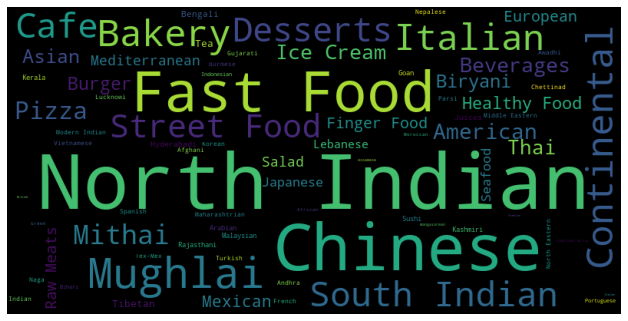

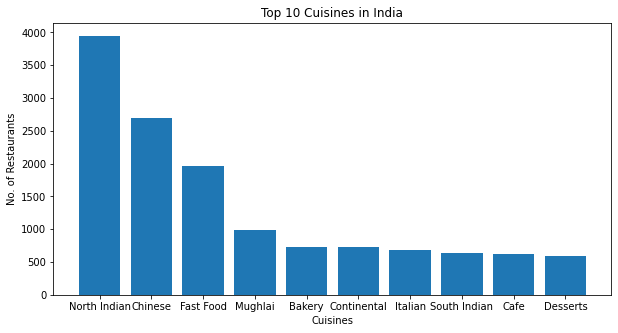

In [34]:
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(Cuisine_Freq)
plt.figure(figsize=(11, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

plt.figure(figsize =(10, 5))
plt.bar(Cuisine_df["index"].head(10),Cuisine_df["no_of_restaurants"].head(10))
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 Cuisines in India")
plt.show()

- Here we have made a word cloud and bar graph showing us the common cuisines served in restaurants of cities which are predominantly located in the National Capital Region. The bargraph shows a cuisine and number of restaurants serving that cuisine.
- Word cloud is a visual way to know the most common cuisine served in restaurants. The size of the cuisines shown in the word cloud will increase with the number of restaurants serving them. Hence we have words such as "North Indian","Chinese","Fast Food" in bigger size relative to other cuisines.

<a id="Tree_Map"></a>
### Popular Cuisines and Cuisines offered at different Price Points

In [35]:
dfZomatoLR["Rank_Avg_Cost"]= dfZomatoLR["average_cost_two"].rank(pct=True)
dfZomatoLR["Rank_Avg_Cost"]=dfZomatoLR["Rank_Avg_Cost"]*100

def RestaurantAvgCostAssign(dataframe):
    if(dataframe["Rank_Avg_Cost"]<=25):
        return "0%-25%"
    elif(dataframe["Rank_Avg_Cost"]>25 and dataframe["Rank_Avg_Cost"]<=50):
        return "25%-50%"
    elif(dataframe["Rank_Avg_Cost"]>50 and dataframe["Rank_Avg_Cost"]<=75):
        return "50%-75%"
    else:
        return "75%-100%"
dfZomatoLR["Avg_Cost_Percentile"]=dfZomatoLR.apply(RestaurantAvgCostAssign,axis=1)
TreeMapData=dfZomatoLR[dfZomatoLR.rating_text.isin(["Very Good","Excellent","Good"])][["Avg_Cost_Percentile"]+unique_cuisines].groupby("Avg_Cost_Percentile").sum()
TreeMapData=TreeMapData.reset_index()
#Melting The data so that our data is according to the format which is reqquired by the TreeMap Function
df2=pd.melt(TreeMapData,id_vars=['Avg_Cost_Percentile'],var_name='Cuisines', value_name='res_counts')
## Finding the Price Range in eact percentile rank and merging with the melted table
df3=dfZomatoLR.groupby(["Avg_Cost_Percentile"]).agg(Min=("average_cost_two","min"),Max=("average_cost_two","max")).reset_index()
df3["Price Range"]=(df3["Min"]).astype(str)+"-"+(df3["Max"]).astype(str)+" Rupees"
df2=pd.merge(df2,df3,on="Avg_Cost_Percentile",how="left")

In [36]:
fig10= px.treemap(df2, path=['Avg_Cost_Percentile',"Price Range",'Cuisines'], values='res_counts',color="Avg_Cost_Percentile")
fig10.update_layout(margin = dict(t=50, l=10, r=10, b=10),title="What Cuisines Restaurants with Above Average Ratings offer in different Price Range?")
fig10.show()

#### What we have done - 
Here we have ranked the restaurants based on their average cost for two. Then we have segregated them into 4 categories based on their "average cost for two" rank.
- Restaurants having their rank in bottom 25%.
- Restaurants having their rank in 25%-50%.
- Restaurants having their rank in 50%-75%.
- Restaurants having their rank in 75%-100%.

Afterwards we found the price range of each category.
Then we took out the data of restaurants with above average ratings. Afterwards for each category and for each cuisine we counted the number of restaurants serving them. 

**_Inference_** - 
- This can give us a idea about which cuisines are popular in different price range. For e.g when we see cuisines popular in price range of 0-290 Rupees we can find likes of Street food, fast food, mithai , desserts,bakery which are snacks item and local cuisines. But as we move upwards on "average cost for two" we see increase in foreign cuisines such as Continental, Italian and also the number of restaurants serving snack items become less as "Average cost for two" increases.

### Location of Restaurants at different Price Points

Since most of the restaurants are present in NCR region of India. We will plot individual restaurants on map for different price points.

In [37]:
temp_data=dfZomatoLR[dfZomatoLR.City.isin(["New Delhi","Ghaziabad","Gurgaon","Faridabad","Noida"])].copy()
temp_data=temp_data[(temp_data.Latitude!=0) | (temp_data.Longitude!=0)]
temp_data.sort_values(by="average_cost_two",inplace=True)
temp_data["Price Bins"] = pd.cut(temp_data["average_cost_two"],[i for i in range(0,3000,500)]+[8500], precision=0)

In [38]:
fig12 = px.scatter_mapbox(temp_data, 
                          lat='Latitude', 
                          lon='Longitude', 
                          zoom=9,
                          mapbox_style="open-street-map",
                          height=700,color="City",
                          hover_name="Locality",
                          animation_frame="Price Bins", 
                          animation_group="restaurant_name",
                          color_discrete_sequence=["Red","Blue","Brown","Orange","darkgreen"])
fig12.update_traces(marker_size=8)
fig12.update_layout(title="Location Of Restaurants at Different Price Points")


fig12.show()


ValueError: ignored

<a id="Linear Regression Model"></a>
### Linear Regression
We will use linear regression algorithm to predict aggregate ratings the restaurants will recieve based on different data points. We will check co relation between different variables and also select important features from the dataset for predicting the aggregate rating.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
dataT=dfZomatoLR[(dfZomatoLR.rating_text!="Not rated") & dfZomatoLR["City"].isin(["New Delhi","Ghaziabad","Gurgaon","Faridabad","Noida"])].copy()

#### 1.Cuisines offered by zero restaurants 
There are certain cuisines which have no restaurant serving them in the NCR region of India. We will also drop those cuisines as features as they don't have any impact on our model.
Restaurants offering these cuisines were removed when we filtered out the restaurants which were having no ratings or were present outside of NCR region of India.

In [41]:
cuisines_no_retaurants=dataT[unique_cuisines].sum()[dataT[unique_cuisines].sum()==0]
print(cuisines_no_retaurants)

Armenian          0
German            0
Malwani           0
Cuisine Varies    0
BBQ               0
Cajun             0
dtype: int64


In [42]:
cuisines_to_drop=cuisines_no_retaurants.index.tolist()
print(cuisines_to_drop)

['Armenian', 'German', 'Malwani', 'Cuisine Varies', 'BBQ', 'Cajun']


#### 2.Corelation

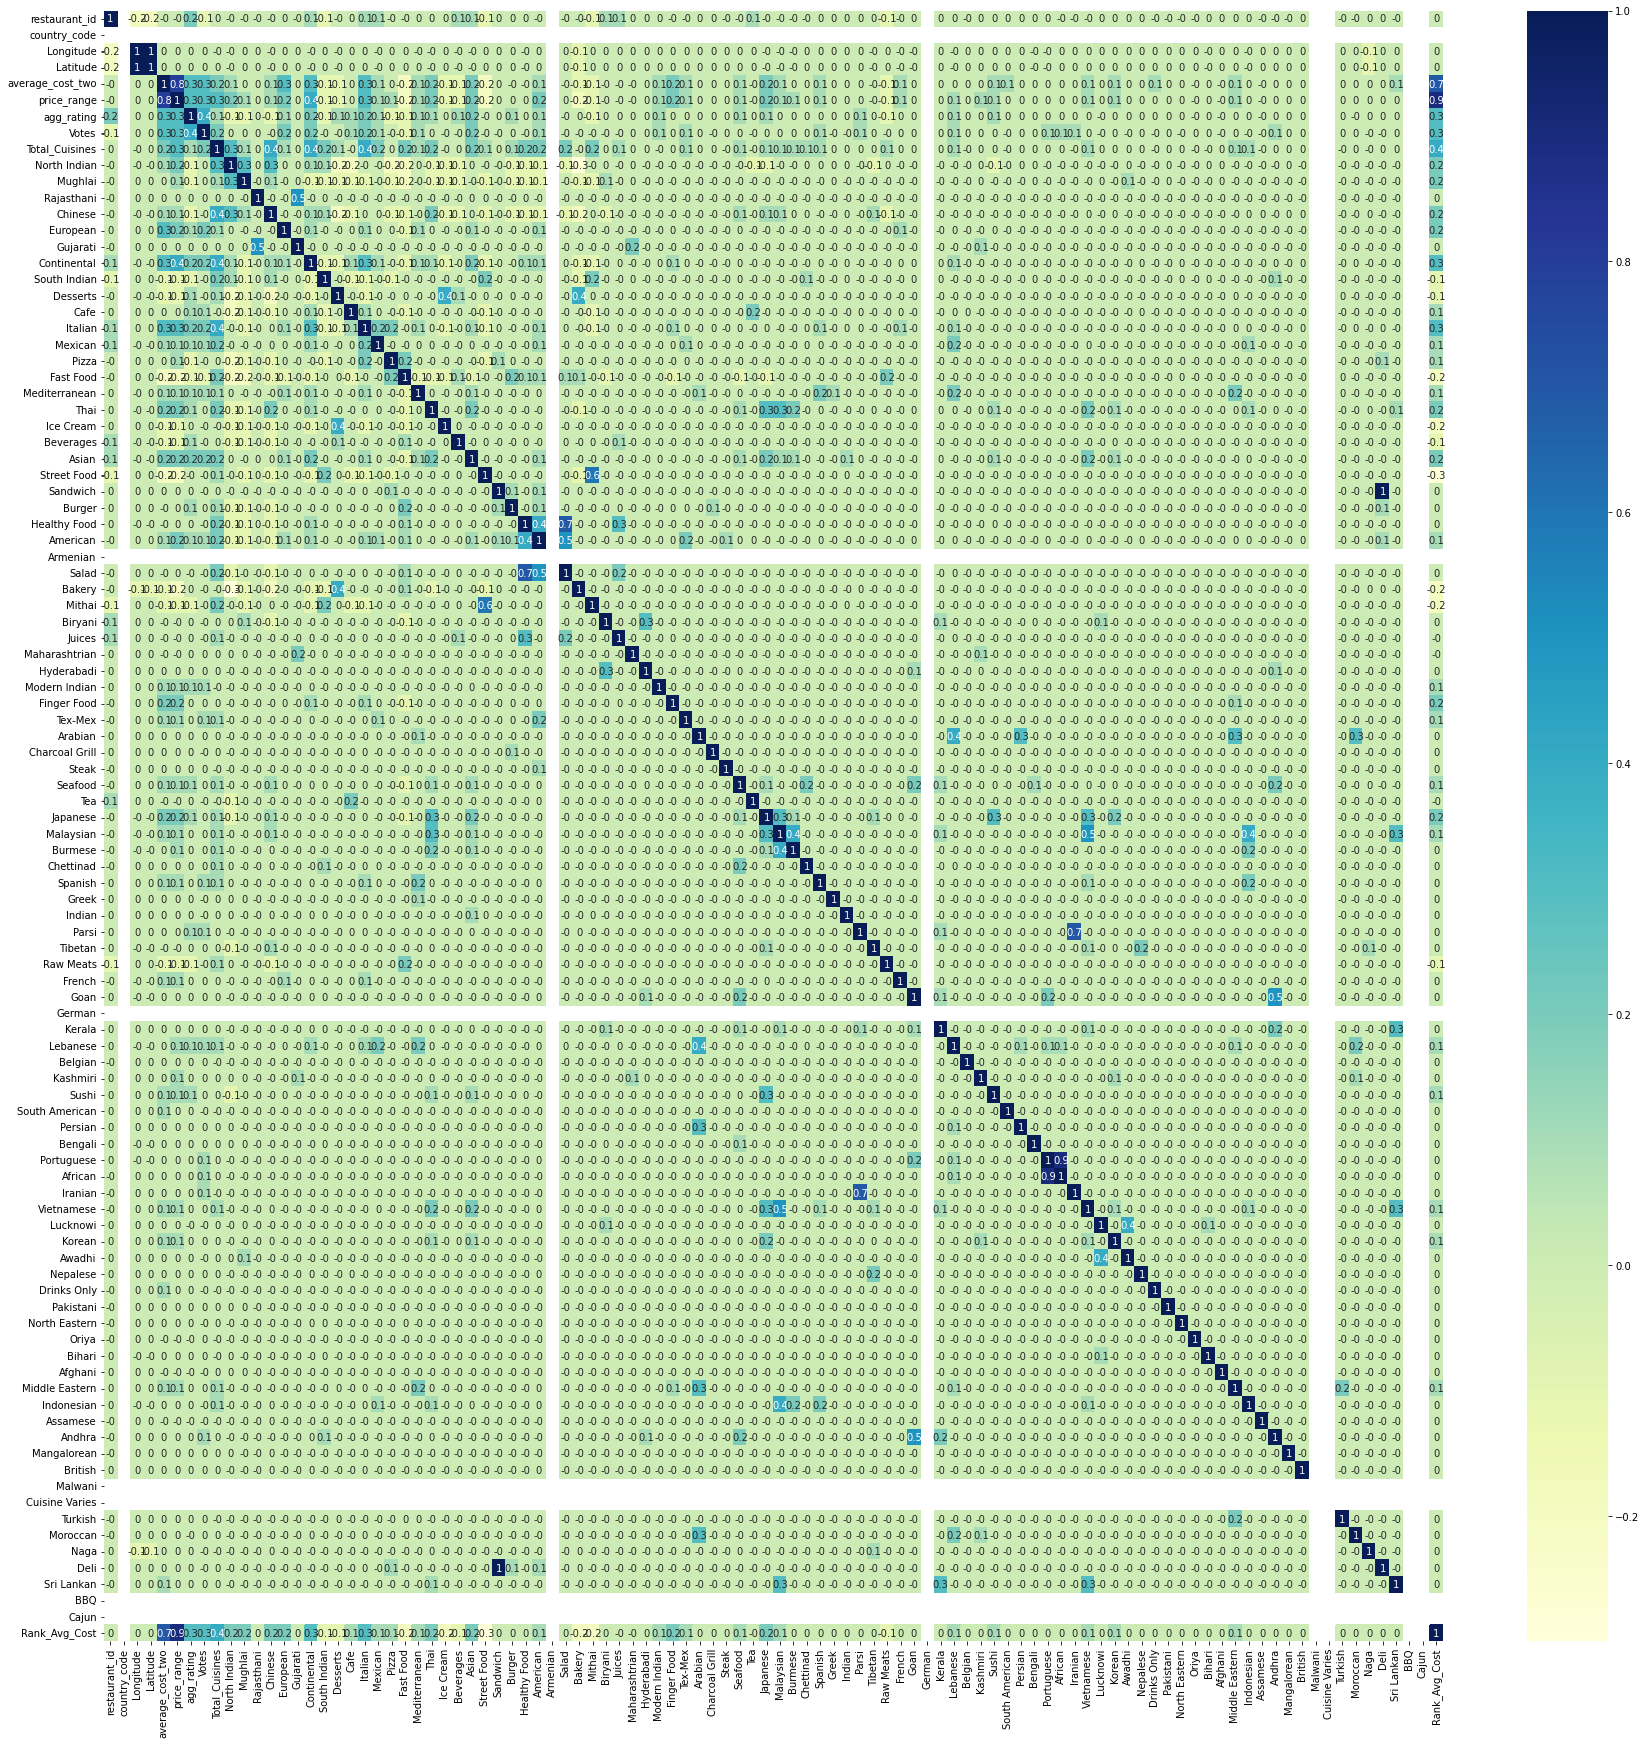

In [43]:
corr_m=dataT.corr()
corr_m=round(corr_m,1)
plt.figure(figsize = (30,30))
sns.heatmap(corr_m, annot = True, cmap="YlGnBu")

**Finding the highly co-linear columns**

First we are only seperating out the upper triangle of the above matrix to avoid repeated values. Then we will filter out the coulmns which have high correlation i.e > 0.9.
Then we will find the other names of the columns which are high corelated to above columns.

In [44]:
matrix=dataT.corr().abs()
upper_tri = matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(bool))
co_col=[column for column in upper_tri.columns if any(upper_tri[column] >= 0.9)]
print(co_col)

['Latitude', 'Deli']


In [45]:
co_linear_col=[]
for c in co_col:
    co_linear_col.append([c,matrix[c][matrix[c]>0.9]])
co_linear_col    

[['Latitude', Longitude    0.995455
  Latitude     1.000000
  Name: Latitude, dtype: float64], ['Deli', Sandwich    1.0
  Deli        1.0
  Name: Deli, dtype: float64]]

In [46]:
cuisines_to_drop.append('Deli')

**Colinearity-**

**Deli** have high colinearity with Feature **Sandwich**. We will later on drop one of them from our feature list as high co related features should not be passed to Linear Regression models. Impact of highly colinear columns results in 
- **Uncertainty in coefficient estimates or unstable variance** : Small changes (adding/removing rows/columns) in the data results in change of coefficients.
- **Increased standard error**: Reduces the accuracy of the estimates and increases the chances of detection.
- **Decreased statistical significance**: Due to increased standard error, t-statistic declines which negatively impacts the capability of detecting statistical significance in coefficient leading to type-II error.
- **Reducing coefficient & p-value**: The importance of the correlated explanatory variable is masked due to collinearity.
- **Overfitting**: Leads to overfitting as is indicated by the high variance problem.

We are not going to consider Latitude and Longitude as our features so we can ignore the high co relation between Latitude and Longitude.

**Variance Inflation Factor (VIF)** - VIF is the ratio of variance of coefficient estimate when fitting the full model divided by the variance of coefficient estimate if fit on its own. The minimum possible value is 1 which indicates no collinearity. If value exceeds 5, then collinearity should be addressed.

**Credits** :- To know more on handling multi-colinearity, please read this [article.](https://towardsdatascience.com/handling-multi-collinearity-6579eb99fd81#:~:text=Variance%20Inflation%20Factor%20(VIF)%3A,1%20which%20indicates%20no%20collinearity)

In [47]:
draft_cuisines= [cuisine for cuisine in unique_cuisines if cuisine not in cuisines_to_drop]

In [48]:
vif=pd.DataFrame()
vif["columns"]=dataT[draft_cuisines].columns
vif["data"] = [variance_inflation_factor(dataT[draft_cuisines].values, i) for i in range(len(vif["columns"]))]

In [49]:
vif.T

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
columns,North Indian,Mughlai,Rajasthani,Chinese,European,Gujarati,Continental,South Indian,Desserts,Cafe,...,Middle Eastern,Indonesian,Assamese,Andhra,Mangalorean,British,Turkish,Moroccan,Naga,Sri Lankan
data,2.160828,1.360937,1.280551,1.793885,1.070997,1.316081,1.383437,1.234078,1.58454,1.108623,...,1.220232,1.313438,1.002837,1.409451,1.00096,1.00607,1.062941,1.185981,1.024641,1.237998


In [50]:
print(vif[vif.data>5])

       columns      data
59  Portuguese  5.149834


In [51]:
print("Cuisines having high Corelation with Portuguese Cuisine: \n"+ str(matrix["Portuguese"][matrix["Portuguese"]>0.5]))

Cuisines having high Corelation with Portuguese Cuisine: 
Portuguese    1.000000
African       0.865951
Name: Portuguese, dtype: float64


We can see that Portuguese have high corelation with African Cuisine and therefore we will remove African cuisine as a feature.

P.S - We can handle this by removing column as the number of restaurants serving either cuisines are very less -3 restaurants serving African- compared to number of records. Otherwise we can use Lasso and ridge regression to remove features which dont add much value to the model. 

In [52]:
final_cuisine_list=[c for c in draft_cuisines if c != "African"]

#### Final Feature Selection
We will select the most important data points that could affect rating. We have explored the dataset quite a bit and have an idea about various data points.

**We know that there is some effect of Total Number of Cuisines, Has Table bookings?, Has Online Delivery? on ratings. We will also add average_cost_two column as feature because we can see there is some moderate correlation between two.**

Excluding price_range as features because it is highly co-related to average_cost_two. We will also have **Votes columns as feature** because there is some weak corelation between Votes and aggregate rating. We will take **individual cuisine columns** as features. We will also consider **city and locality** as location features while building our model.

We have removed 'African' and 'Deli' cuisine column because of high colinearity they had with some other cuisines and few cuisine columns were removed as no restaurant was serving them in NCR Region of India. Others will be passed onto the algorithm as features.

**Not Considering the following Data Points as features**
- **"Is Delivery Now"** - We dont the context "Now" in this scenario, also intuitively if a restaurant is delivering at a specific --point in time should not affect its overall rating.
- **"Switch to Order Menu"**- This is not important as all the restaurants in dataset have "No" for this datapoint.
- **"Latitude","Longitude"** - We are considering City, Locality for location features.
- **"rating_text","rating_color"**- They are dependent on rating itself and not independent features
- **"country_code" **- since we are considering only restaurants in NCR regions of India. The country code will be same for all the restaurants.
- **"Total_Cuisines"**- Dropping this column since it can be computed from other features. 

In [53]:
Col_select=["City","table_booking","Locality","online_delivery","average_cost_two","Votes","agg_rating"]+final_cuisine_list

In [54]:
dataT=dataT[Col_select]

In [55]:
dataT["table_booking"]=dataT["table_booking"].map({"Yes":1,"No":0})
dataT["online_delivery"]=dataT["online_delivery"].map({"Yes":1,"No":0})
dataT["City"]=dataT["City"].astype('category')
dataT["Locality"]=dataT.Locality.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

#### One Hot Encoding

In [56]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
dataT=dummies("City",dataT)
dataT=dummies("Locality",dataT)

#### Regression Model

In [57]:
np.random.seed(25)
df_Train, df_Test = train_test_split(dataT, train_size = 0.7, test_size = 0.3, random_state = 10)
scaler=StandardScaler()
num_vars=["average_cost_two","Votes"]
df_Train[num_vars] = scaler.fit_transform(df_Train[num_vars])
Y=df_Train["agg_rating"]
df_Train.drop("agg_rating",inplace=True,axis=1)
lin_reg = LinearRegression()
lin_reg=lin_reg.fit(df_Train,Y)
coef=pd.DataFrame(data={"Features":lin_reg.feature_names_in_,"Coeff":lin_reg.coef_})
print("Linear Regression Model R-Square Score: "+ str(lin_reg.score(df_Train,Y)))
print("Linear Regression Intercept: "+str(lin_reg.intercept_))
print("Coefficients")
print(coef.head(10))

Linear Regression Model R-Square Score: 0.44915833029427266
Linear Regression Intercept: 3.2216173751211246
Coefficients
           Features     Coeff
0     table_booking  0.016929
1   online_delivery  0.036592
2  average_cost_two  0.072566
3             Votes  0.095015
4      North Indian -0.071372
5           Mughlai  0.001313
6        Rajasthani  0.093574
7           Chinese -0.078888
8          European  0.065223
9          Gujarati  0.235992


In [58]:
Y_Test=df_Test["agg_rating"]
df_Test.drop("agg_rating",inplace=True,axis=1)
df_Test[num_vars]=scaler.fit_transform(df_Test[num_vars])

In [59]:
pred=lin_reg.predict(df_Test)
df_Pred_result=pd.DataFrame(data={'actial':Y_Test,"pred":pred}).reset_index()
df_Pred_result.head(10)
Mean_Square_Error=((pred-Y_Test)**2).mean()
Mean_Absolute_Error=(abs(pred-Y_Test)).mean()
Mean_Absolute_Percent_Error=((abs(pred-Y_Test)/Y_Test)*100).mean()

In [60]:
fig13 = go.Figure()
fig13.add_trace(go.Scatter(x=df_Pred_result.loc[1200:1225].index, 
                           y=df_Pred_result.loc[1200:1225,"actial"],
                           mode="markers" ,
                           marker_symbol=4,
                           name='Actual Rating',
                           marker=dict(color='firebrick',size=10
                                    )))
fig13.add_trace(go.Scatter(x=df_Pred_result.loc[1200:1225].index, 
                           y=df_Pred_result.loc[1200:1225,"pred"],
                           mode="markers" ,
                           marker_symbol=3,
                           name = 'Predicted Rating',
                           marker=dict(color='royalblue',size=10
                                    )))
fig13.update_layout(title="Predicted Rating vs Actual Rating")
fig13.update_yaxes(range=(0,5.25),title="Rating")

fig13.show()

Text(0.5, 1.0, 'Distribution of Actual Ratings')

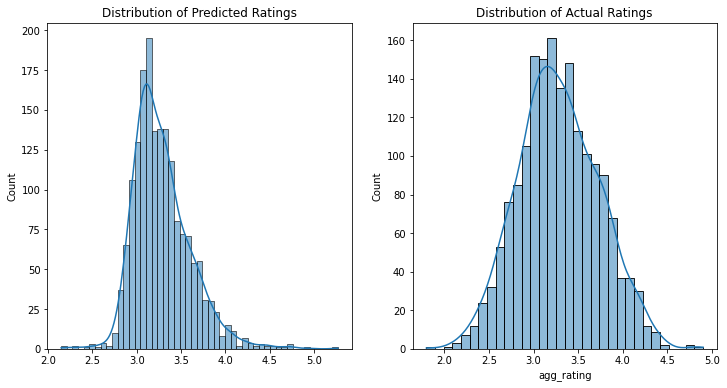

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))
sns.histplot(pred,kde=True, ax=ax1)
ax1.set_title('Distribution of Predicted Ratings')
sns.histplot(Y_Test,kde=True, ax=ax2)
ax2.set_title('Distribution of Actual Ratings')

<a id="Performance_of_LR_Model"></a>
### Results and Performance of model on Test Data

In [62]:
print("Results")
print("R-Square :"+str(lin_reg.score(df_Test,Y_Test)))
print("Mean Square Error: "+str(Mean_Square_Error))
print("Mean Absolute Error: "+str(Mean_Absolute_Error))
print("Mean Absolute Percent Error: "+str(Mean_Absolute_Percent_Error))

Results
R-Square :0.3209984009348331
Mean Square Error: 0.13915474370146483
Mean Absolute Error: 0.28694827410331963
Mean Absolute Percent Error: 9.056286039506086


These are metrics to analyze the accuracy of our Linear Regression Model. We can infer from the 'Predicted Rating vs Actual Rating' graph that for some restaurants we are missing the actual rating quite widely and for some we are predicting it quite accurately.

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

The R² value implies that there is 32.09% less variation around our Linear Regression line than the mean. If we had more relevant data points such as average wating time, Portion Size, availability of various facilities such as AC, Fan etc, this score could be improved.

The Mean Square Error and Mean Absolute Error are quite low and we are able to predict all our values close to the actual value. Mean Absolute Percent Error tells us, on an average, we are 9 percent off from the actual rating.

The aim of this project was to explore the data, extract the important features and make a linear regression model. We were successful in doing that.    